In [1]:
from CTRNN import CTRNN
from stochsearch import EvolSearch
import numpy as np
import matplotlib.pyplot as plt


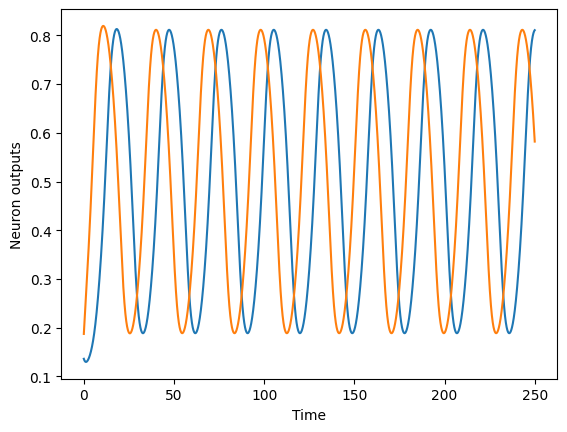

In [2]:
# params
run_duration = 250
net_size = 2
step_size = 0.01

# set up network
network = CTRNN(size=net_size,step_size=step_size)
network.taus = [1.,1.]
network.biases = [-2.75,-1.75]
network.weights[0,0] = 4.5
network.weights[0,1] = 1
network.weights[1,0] = -1
network.weights[1,1] = 4.5

# initialize network
network.randomize_outputs(0.1,0.2)

# simulate network
outputs = []
for _ in range(int(run_duration/step_size)):
    network.euler_step([0]*net_size) # zero external_inputs
    outputs.append([network.outputs[i] for i in range(net_size)])
outputs = np.asarray(outputs)

# plot oscillator output
plt.plot(np.arange(0,run_duration,step_size),outputs[:,0])
plt.plot(np.arange(0,run_duration,step_size),outputs[:,1])
plt.xlabel('Time')
plt.ylabel('Neuron outputs')
plt.show()

In [3]:
# access nn output 
print(network.outputs)
#network.outputs = [0.5,0.75,0.4]

[0.81047031 0.58190934]


# Search

In [ ]:
def fitness_function():
    

In [ ]:
evol_params = {
    'num_processes' : 4, # (optional) number of proccesses for multiprocessing.Pool
    'pop_size' : 100,    # population size
    'genotype_size': 10, # dimensionality of solution
    'fitness_function': fitness_function, # custom function defined to evaluate fitness of a solution
    'elitist_fraction': 0.04, # fraction of population retained as is between generations
    'mutation_variance': 0.05, # mutation noise added to offspring.
    'fitness_args': np.arange(100), # (optional) fitness_function *argv, len(list) should be 1 or pop_size
}


es = EvolSearch(evol_params)

# just iterate
num_gens = 100
es.execute_search(num_gens)

In [ ]:
# based on condition

max_num_gens = 100
gen = 0
desired_fitness = 0.9
while es.get_best_individual_fitness() < desired_fitness and gen < max_num_gens:
        print("Gen #{} Best Fitness = {}".format(gen, es.get_best_individual_fitness()))
        es.step_generation()
        gen += 1

In [ ]:
print('Max fitness of population = ',es.get_best_individual_fitness())
print('Best individual in population = ',es.get_best_individual())